In [1]:
# Importar librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Leer archvio
dataFrame = pd.read_csv('./DataBase/mall_customers.csv')
print(dataFrame.head())
print(dataFrame.describe())

   CustomerID   Genre  Age  Annual Income ($)  Spending Score (1-100)
0           1    Male   19              15000                      39
1           2    Male   21              15000                      81
2           3  Female   20              16000                       6
3           4  Female   23              16000                      77
4           5  Female   31              17000                      40
       CustomerID         Age  Annual Income ($)  Spending Score (1-100)
count  200.000000  200.000000         200.000000              200.000000
mean   100.500000   38.850000       60560.000000               50.200000
std     57.879185   13.969007       26264.721165               25.823522
min      1.000000   18.000000       15000.000000                1.000000
25%     50.750000   28.750000       41500.000000               34.750000
50%    100.500000   36.000000       61500.000000               50.000000
75%    150.250000   49.000000       78000.000000               73.000

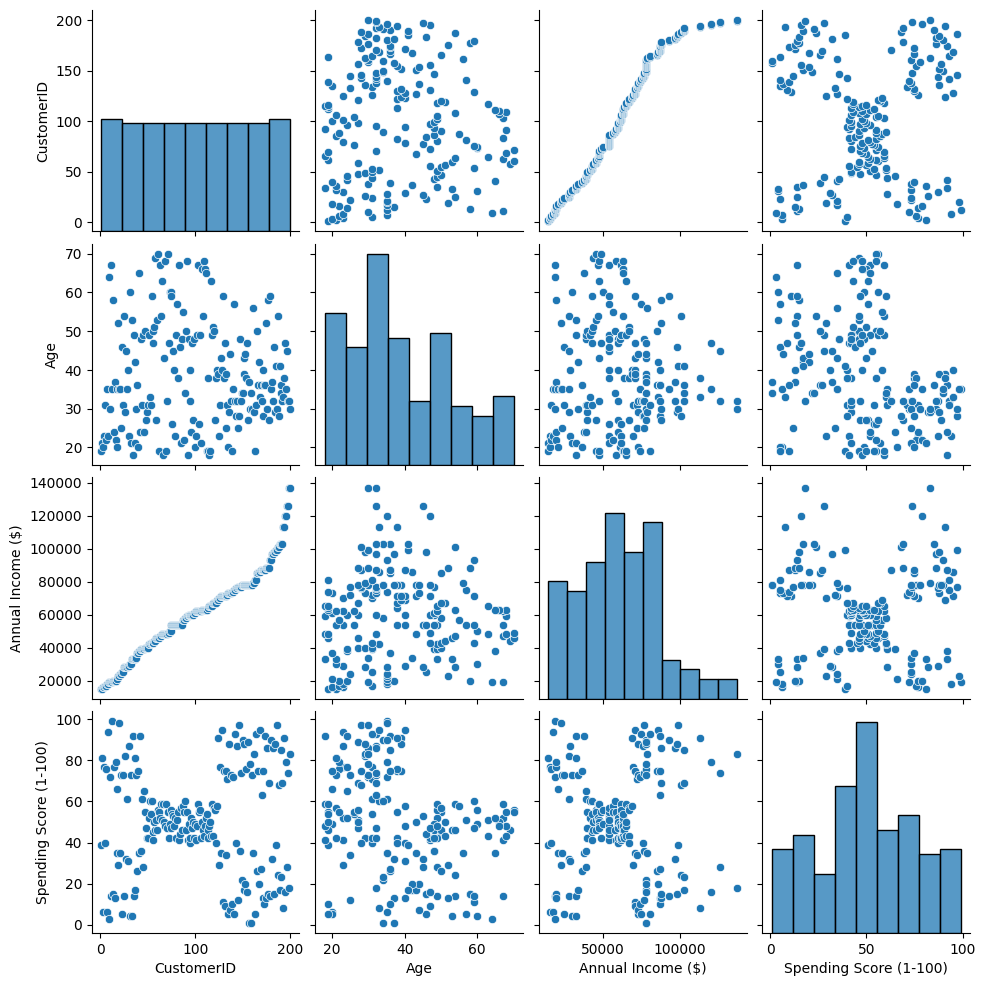

In [3]:
# Ver la correlación de las características
sns.pairplot(dataFrame)

In [4]:
# Cambiar Male por 0 y Female por 1
dataFrame['Genre'] = dataFrame['Genre'].replace(['Male', 'Female'], [0, 1])

C:\Users\ricki\AppData\Local\Temp\ipykernel_6852\1672421494.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['Genre'] = dataFrame['Genre'].replace(['Male', 'Female'], [0, 1])


In [5]:
# Verificar si se realizaron los cambios
print(dataFrame.head())

   CustomerID  Genre  Age  Annual Income ($)  Spending Score (1-100)
0           1      0   19              15000                      39
1           2      0   21              15000                      81
2           3      1   20              16000                       6
3           4      1   23              16000                      77
4           5      1   31              17000                      40


In [ ]:
# Características
x = dataFrame[['Genre','Age','Annual Income ($)','Spending Score (1-100)']]

In [6]:
# Solo con 2 características
x = dataFrame[['Annual Income ($)','Spending Score (1-100)']]

In [7]:
# Normalizar los datos RECOMENDACIÓN PARA TODOS LOS DATOS
x = (x-x.mean())/x.std()

# Eliminar valores nulos
x = x.dropna()

In [8]:
# Variables para la gráfica de codo
k_values = range(2,10)
inertia = []
silhouettes = []
for k in k_values:
    model = KMeans(k,random_state=123)
    model.fit(x)
    inertia.append(model.inertia_)
    silhouette = silhouette_score(x,model.labels_)
    silhouettes.append(silhouette)

Text(0.5, 1.0, 'Gráfica de codo')

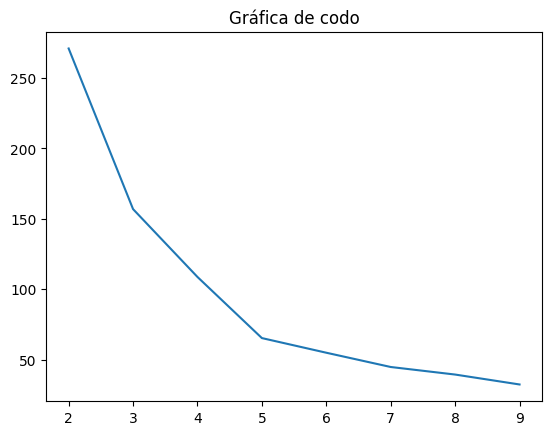

In [9]:
# Gráfica de codo
plt.plot(k_values,inertia)
plt.title('Gráfica de codo')

Text(0.5, 1.0, 'Gráfica de siluetas')

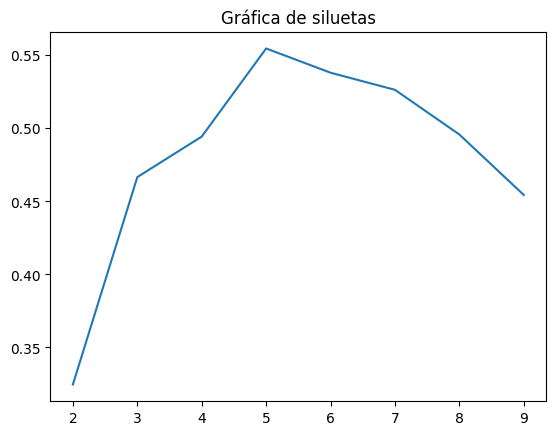

In [10]:
# Gráfica de siluetas
plt.plot(k_values,silhouettes)
plt.title('Gráfica de siluetas')

In [11]:
# Crear el modelo (Vecinos Cercanos)
model = KMeans(5,random_state=123)

In [12]:
# Entrenar el modelo
model.fit(x)

KMeans(n_clusters=5, random_state=123)

In [13]:
# Obtener los clusters asignados para cada punto de datos
clusters = model.labels_
dataFrame['Cluster'] = clusters
				
# Visualizar la asignación de clusters
dataFrame.head()

,CustomerID,Genre,Age,Annual Income ($),Spending Score (1-100),Cluster
0,1,0,19,15000,39,4
1,2,0,21,15000,81,3
2,3,1,20,16000,6,4
3,4,1,23,16000,77,3
4,5,1,31,17000,40,4


In [14]:
# Etiquetas y centroides
tags = model.labels_
centroids = model.cluster_centers_

print(f'Etiquetas: {tags}')
print(f'Centroides: {centroids}')

Etiquetas: [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]
Centroides: [[ 0.98910098  1.23640011]
 [-0.20040965 -0.02638995]
 [ 1.05236221 -1.28122394]
 [-1.32621729  1.12934389]
 [-1.3042458  -1.13411939]]


In [15]:
# Métricas de evaluación
print(f'Inercia: {model.inertia_}')
silhouette_metric = silhouette_score(x,model.labels_)
print(f'Silueta: {silhouette_metric}')

Inercia: 65.24056611493823
Silueta: 0.5546571631065009


Text(0, 0.5, 'Spending Score (1-100)')

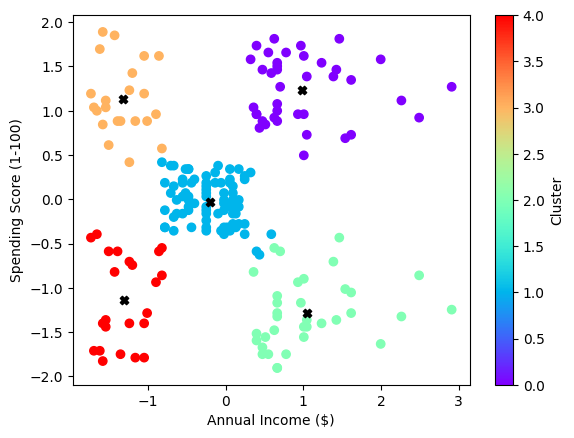

In [16]:
# Gráfico de disperción
# Colocar nombre en las etiquetas
grafic = plt.scatter(x['Annual Income ($)'],x['Spending Score (1-100)'],cmap='rainbow',label=tags,c=tags)
plt.scatter(centroids[:,0],centroids[:,1],color='black',marker='X',label='centroids')
plt.colorbar(grafic,label='Cluster')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')

In [ ]:
# Predicción N°1
"""Asignar un nuevo cliente femenino de 40 años, con un ingreso anual de 70000 y un puntaje de gasto de 50."""
X = np.array([[1,40,70000,50]])
X = (X-X.mean())/X.std()
predict_1 = model.predict(X)
print(f"Asignación del cliente en el clúster N°: {predict_1}")

Asignación del cliente en el clúster N°: [4]


C:\Users\ricki\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [17]:
# Predicción N°1 || 2 Características
"""Asignar un nuevo cliente femenino de 40 años, con un ingreso anual de 70000 y un puntaje de gasto de 50."""
X = np.array([[70000,50]])
X = (X-X.mean())/X.std()
predict_1 = model.predict(X)
print(f"Asignación del cliente en el clúster N°: {predict_1}")

Asignación del cliente en el clúster N°: [2]


C:\Users\ricki\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [230]:
# Predicción N°2
"""Asignar un nuevo cliente masculino de 80 años, con un ingreso anual de 80000 y un puntaje de gasto de 70."""
X = np.array([[0,80,80000,70]])
X = (X-X.mean())/X.std()
predict_2 = model.predict(X)
print(f"Asignación del cliente en el clúster N°: {predict_2}")

Asignación del cliente en el clúster N°: [4]


C:\Users\ricki\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [18]:
# Predicción N°2 || 2 Características
"""Asignar un nuevo cliente masculino de 80 años, con un ingreso anual de 80000 y un puntaje de gasto de 70."""
X = np.array([[80000,70]])
X = (X-X.mean())/X.std()
predict_2 = model.predict(X)
print(f"Asignación del cliente en el clúster N°: {predict_2}")

Asignación del cliente en el clúster N°: [2]


C:\Users\ricki\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [231]:
# Predicción N°3
"""Asignar un nuevo cliente femenino de 20 años, con un ingreso anual de 60000 y un puntaje de gasto de 10."""
X = np.array([[1,20,60000,10]])
X = (X-X.mean())/X.std()
predict_3 = model.predict(X)
print(f"Asignación del cliente en el clúster N°: {predict_3}")

Asignación del cliente en el clúster N°: [4]


C:\Users\ricki\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [19]:
# Predicción N°3 || 2 Características
"""Asignar un nuevo cliente femenino de 20 años, con un ingreso anual de 60000 y un puntaje de gasto de 10."""
X = np.array([[60000,10]])
X = (X-X.mean())/X.std()
predict_3 = model.predict(X)
print(f"Asignación del cliente en el clúster N°: {predict_3}")

Asignación del cliente en el clúster N°: [2]


C:\Users\ricki\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
